# Projeto 2 - Extraindo e analisando dados de redes sociais - TikTok

#### Prof. Matheus C. Pestana (FGV-ECMI)

### FAÇA UMA ANÁLISE DESCRITIVA EM CADA UMA DAS PERGUNTAS. NÃO BASTA APENAS RODAR O CÓDIGO.

**Nome do aluno, dupla ou trios:**

In [1]:
nomes = input("Nome dos alunos: ")
print(nomes)

Nome dos alunos: Matheus C. Pestana
Matheus C. Pestana


In [2]:
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, NMF, LatentDirichletAllocation
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')

Você(s) podem escolher uma base do Git (aqui https://github.com/mateuspestana/LabExtracaoAnalise_ECMI/tree/main/bases) ou raspar um novo termo do TikTok.

In [12]:
df = pd.read_excel('https://github.com/mateuspestana/LabExtracaoAnalise_ECMI/raw/main/bases/projeto_russia.xlsx')
df

,user,url,id,desc,music,likes,comments,shares,views,date,challenges,duration
0,zarvladimirputin,https://m.tiktok.com/v/7228361666239466779,7228361666239466496,Let's go 🚀🚀 #владимирпутин #vladimirputin #...,SOCO SOCO SOCO / CADA HIT NA FAVELA É UM TERRE...,15000000,73300,54700,215200000,2023-05-01 23:35:23,"president, vladimirputin, moment, владимирпути...",49
1,miss.marhaba,https://m.tiktok.com/v/7052313547895835906,7052313547895835648,Herring with milk. Russian girl. Marxaba. Fake...,оригинальный звук,8300000,205000,363800,193000000,2022-01-12 13:38:23,"russiangirl, russia, fake, marxaba",14
2,stasyasingerr,https://m.tiktok.com/v/7034532905741339905,7034532905741339648,Можно еще один тренд закрыть? 😅 #bear #russia ...,rowdy rebel x 1sis,8300000,48500,53800,48500000,2021-11-25 15:40:25,"russia, fyp, bear",9
3,polakniko,https://m.tiktok.com/v/7064987416897146117,7064987416897145856,#fyp #russia #ukraine,All Alone,8100000,194300,147500,53600000,2022-02-15 17:19:28,"ukraine, fyp, russia",41
4,cheddygrace,https://m.tiktok.com/v/7068502149226925339,7068502149226925056,Emotional moment as Ukraine soldiers left wive...,Only Love Can Hurt Like This (Slowed Down Vers...,7900000,22900,179700,37300000,2022-02-25 04:38:26,"ukraine, russia, globalnews, fyp",18
...,...,...,...,...,...,...,...,...,...,...,...,...
901,slidesandvibez,https://m.tiktok.com/v/7151449373493267755,7151449373493267456,Some interesting pictures for you guys 📸 #hist...,Nangs,654500,2328,1198,3200000,2022-10-06 17:16:29,"war, samurai, historical, photography, culture...",0
902,philipdefranco,https://m.tiktok.com/v/7150408618674785579,7150408618674785280,Ukraine And Elon Musk Duke It Out On Twitter #...,original sound,631000,5188,2463,5500000,2022-10-03 21:57:27,"tesla, russia, estonia, andGO, ukraine, elonmusk",34
903,tcnnew,https://m.tiktok.com/v/7068654314901851438,7068654314901851136,"Ukraine TỔN THẤT NẶNG NỀ, thế giới cầu nguyện ...",nhạc nền - TinCapNhat,597800,19300,16400,11700000,2022-02-25 14:28:55,"tincapnhat, tikker, putin, russia, ukraine",180
904,onlythebestmemes,https://m.tiktok.com/v/7069779786926673198,7069779786926672896,Ukrainian strong #ukrainianreaper #ukraine #ru...,sonido original,588000,1975,358,5200000,2022-02-28 15:16:20,"ukrainianreaper, ukraine, russia, nevergiveup",20


# 1) Qual a média de curtidas, likes, shares, views e duração no total? E por usuário? (0,1)

In [8]:
df.agg({'likes':['mean'],
                           'comments': ['mean'],
                           'shares': ['mean'],
                           'views': ['mean']}).round(2).reset_index()

,index,likes,comments,shares,views
0,mean,1173163.69,12084.79,25588.11,12177152.32


In [6]:
df.groupby('user').agg({'likes':['mean'],
                           'comments': ['mean'],
                           'shares': ['mean'],
                           'views': ['mean']}).round(2).sort_values(by=('likes', 'mean'), ascending=False).reset_index()

,user,likes,comments,shares,views
,,mean,mean,mean,mean
0,miss.marhaba,8300000.0,205000.0,363800.0,193000000.0
1,polakniko,8100000.0,194300.0,147500.0,53600000.0
2,cheddygrace,7900000.0,22900.0,179700.0,37300000.0
3,videos_aleatorios920,6600000.0,55300.0,25700.0,61500000.0
4,stasyasingerr,6200000.0,45150.0,55950.0,39850000.0
...,...,...,...,...,...
624,dalitazka_,534400.0,4141.0,1977.0,5800000.0
625,missingcommunism,532700.0,12900.0,6884.0,4700000.0
626,tdshk20041,532000.0,930.0,1982.0,16900000.0


Análise:

# 2) Qual a proporção, por usuário, de comentários por like? Ou seja, a cada like, quantos comentários o usuário recebe? Organize por quem engaja mais (ou seja, nesse caso, quem tem mais comentários por like) (0,1)

In [11]:
df['prop_commentlike'] = df['comments'] / df['likes']
df.groupby('user')['prop_commentlike'].mean().to_frame().sort_values(by='prop_commentlike', ascending=False)

,prop_commentlike
user,
chemodanhippi,0.116449
stefanb.hvnt,0.075995
charlietop10s,0.063205
mapgoat,0.049804
news.com.au,0.044763
...,...
davidprasievi,0.000000
lesya.shiny,0.000000
kvkz.ddva,0.000000


Análise:

# 3) Plote um gráfico com a média de views ou likes ao longo do tempo, por mês (0,1)

<Axes: xlabel='date'>

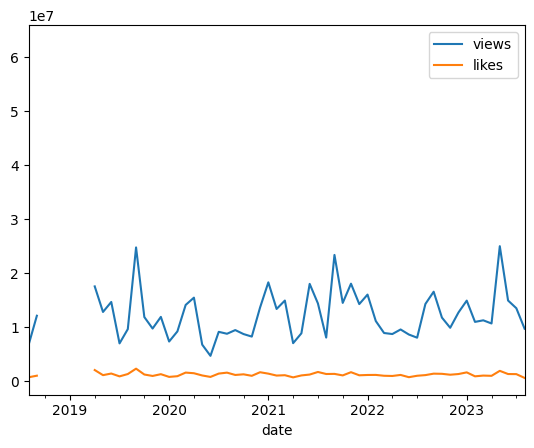

In [17]:
df2 = df.set_index('date')
df2.resample('M')[['views', 'likes']].mean().plot()

Análise:

# 4) Quais as 100 hashtags mais utilizadas? Faça uma nuvem de palavras com elas. (0,2)

In [18]:
df_challenges = df.copy()
df_challenges['challenges'] = df_challenges['challenges'].str.split(', ')
pd.DataFrame(Counter(df_challenges['challenges'].sum()).most_common(100))

,0,1
0,russia,906
1,fyp,311
2,ukraine,252
3,foryou,178
4,usa,136
...,...,...
95,lol,9
96,sad,9
97,fight,9
98,врекомендации,9


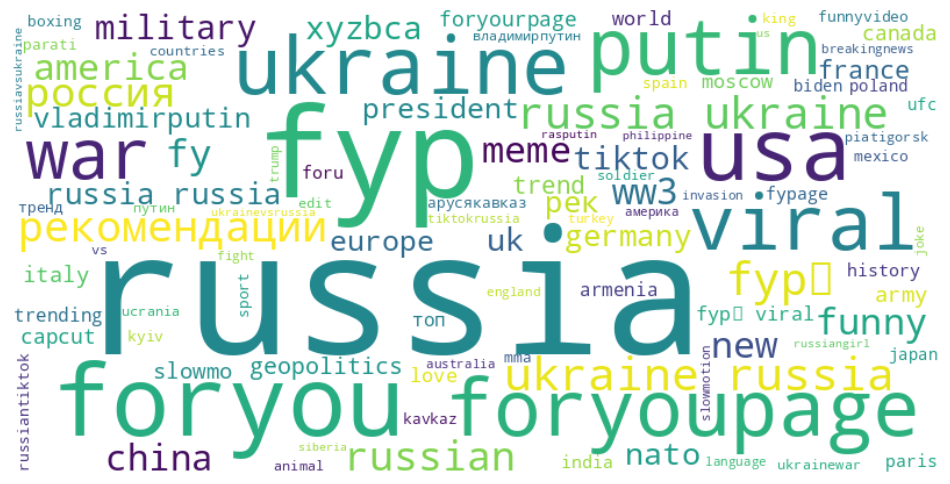

In [19]:
wordcloud = WordCloud(width=800, height=400, max_font_size=150, max_words=100, background_color='white').generate(' '.join(df_challenges['challenges'].sum()))
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Análise:

# 5) Faça modelagem de tópicos com as hashtags. Escolha um número razoável de tópicos em que os tópicos sejam diferentes entre si e tenham significância. (0,2)

In [22]:
df['challenges_clean'] = df['challenges'].str.split(', ')

tfidf = TfidfVectorizer(max_df=0.9, min_df=0.01, max_features=1000)
nmf = NMF(n_components=5)
challenges = tfidf.fit_transform(df['challenges_clean'].apply(lambda x: ' '.join(x)))
challenges_nmf = nmf.fit_transform(challenges)

for index, topic in enumerate(nmf.components_):
    print(f'Top 15 challenges por tópico: #{index+1}')
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')

Top 15 challenges por tópico: #1
['uk', 'europe', 'biden', 'army', 'invasion', 'world', 'military', 'ukrainewar', 'kyiv', 'nato', 'ww3', 'geopolitics', 'news', 'war', 'ukraine']


Top 15 challenges por tópico: #2
['trend', 'meme', 'germany', 'war', 'russian', 'ww3', 'military', 'xyzbca', 'funny', 'foryou', 'fy', 'fypシ', 'foryoupage', 'viral', 'fyp']


Top 15 challenges por tópico: #3
['love', 'foryourpage', 'italy', 'foru', 'россия', 'tiktok', 'twins', 'slowmotion', 'тренд', 'slowmo', 'топ', 'рек', 'foryoupage', 'foryou', 'рекомендации']


Top 15 challenges por tópico: #4
['world', 'biden', 'fypシ', 'nato', 'ww3', 'breakingnews', 'trump', 'путин', 'news', 'россия', 'владимирпутин', 'king', 'vladimirputin', 'president', 'putin']


Top 15 challenges por tópico: #5
['kavkaz', 'paris', 'арусякавказ', 'india', 'military', 'viral', 'canada', 'war', 'америка', 'russian', 'uk', 'china', 'america', 'россия', 'usa']




Análise:

# 6) Faça a segmentação dos vídeos a partir das suas métricas (likes, comentários, shares, views e duração). Em seguida, analise as métricas de cada cluster. (0,3)

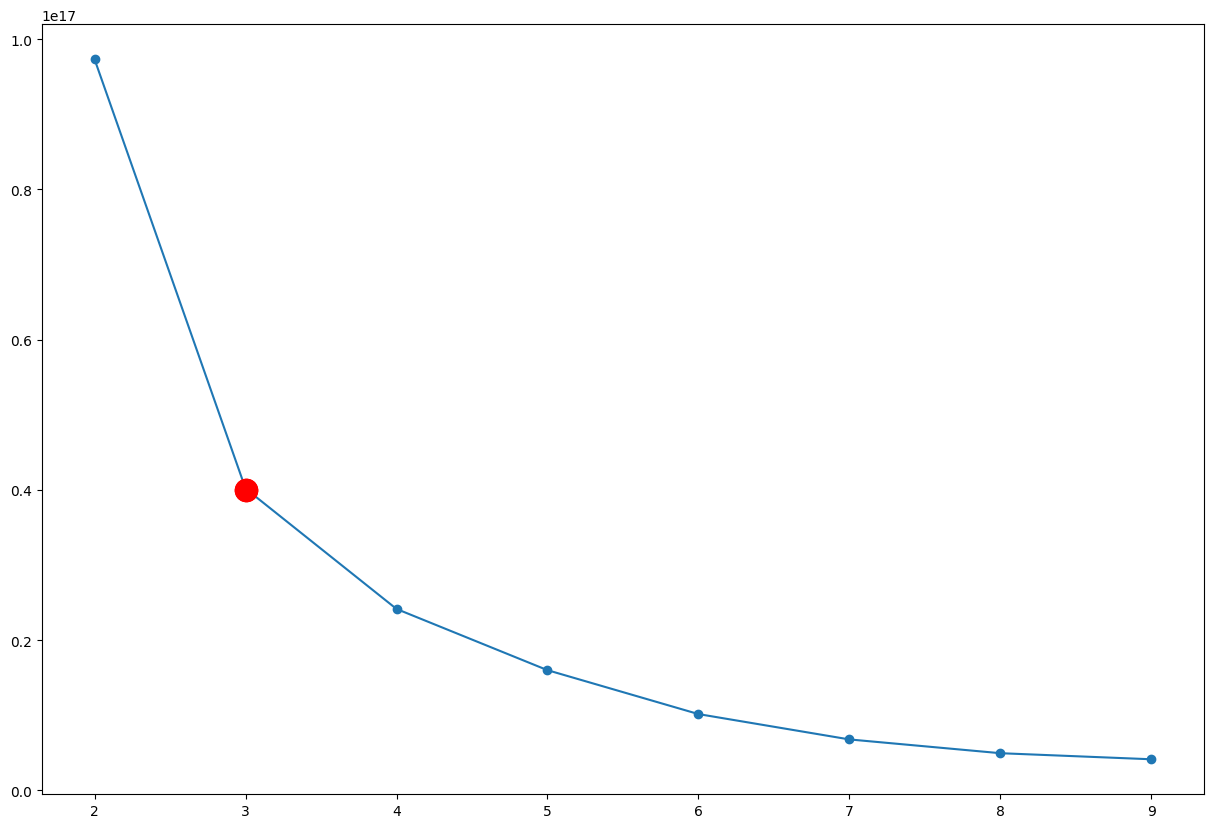

In [26]:
segmentacao = df[['likes', 'shares', 'comments', 'views', 'duration']]
inertia = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, n_init=100, max_iter=1000)
    segmentacao_kmeans = kmeans.fit(segmentacao)
    inertia.append(segmentacao_kmeans.inertia_)
plt.figure(figsize=(15, 10))
plt.plot(range(2, 10), inertia, '-o')
plt.plot([3, 3], [0.4*1e17, 0.4*1e17], 'o', c='red', markersize=16)
plt.show()

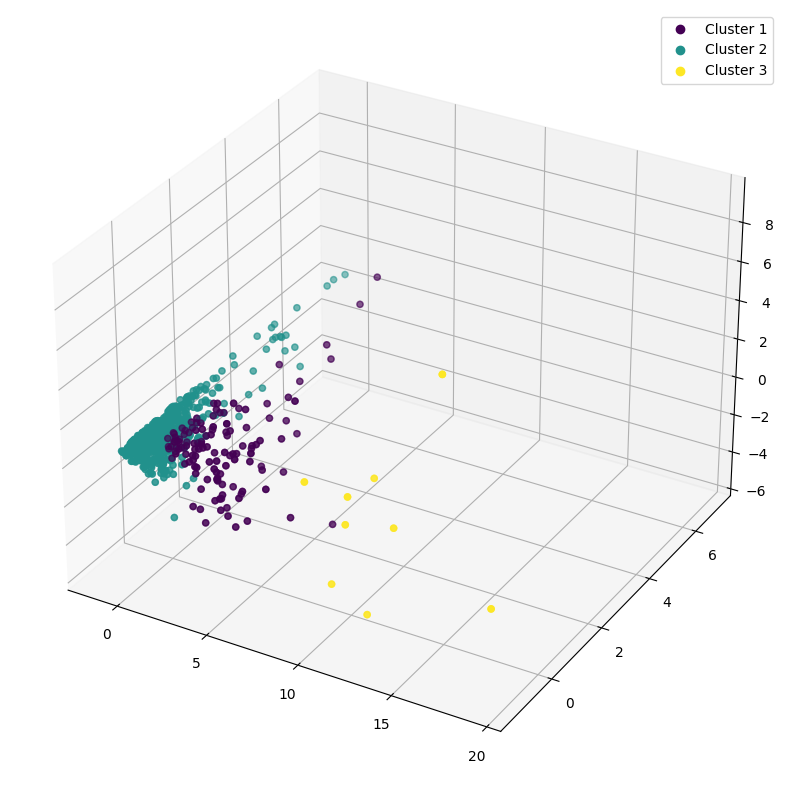

In [40]:
# Pelo método do cotovelo, o ideal são 3 clusters.
pca = PCA(n_components=3)
standard_scaler = StandardScaler()

segmentacao_scaled = standard_scaler.fit_transform(segmentacao)
segmentacao_reduzida = pca.fit_transform(segmentacao_scaled)

kmeans = KMeans(n_clusters=3, n_init=10, max_iter=1000)
segmentacao_kmeans = kmeans.fit(segmentacao_scaled)
segmentacao['cluster'] = segmentacao_kmeans.labels_
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(segmentacao_reduzida[:, 0], segmentacao_reduzida[:, 1], segmentacao_reduzida[:, 2], c=segmentacao_kmeans.labels_, cmap='viridis')
ax.legend(handles=ax.scatter(segmentacao_reduzida[:, 0], segmentacao_reduzida[:, 1], segmentacao_reduzida[:, 2],
                            c=segmentacao_kmeans.labels_, cmap='viridis').legend_elements()[0], labels=['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()

Análise: